In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)



2.3.0


In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)


60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

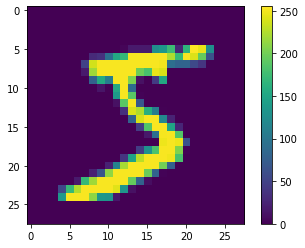

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


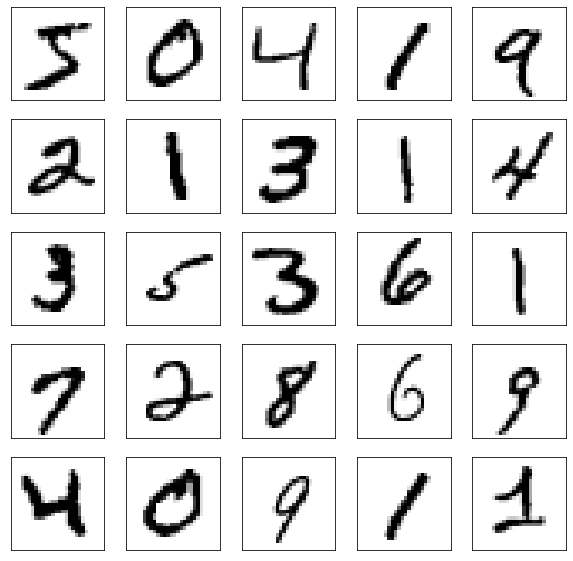

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1691 - accuracy: 0.7235
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4878 - accuracy: 0.8741
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3837 - accuracy: 0.8950
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3418 - accuracy: 0.9036
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3179 - accuracy: 0.9084
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3014 - accuracy: 0.9139
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.9174
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2774 - accuracy: 0.9202
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2679 - accuracy: 0.9233
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.259

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.2527 - accuracy: 0.9276

Test accuracy: 0.9276000261306763


In [ ]:
model.save('model_mnist.h5')